<h1>Red Wine Data Analysis</h1>

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import metrics
%matplotlib inline

In [2]:
# loading wine dataset
red_wine_df = pd.read_csv("winequality-red-DESKTOP-J5NCTS6.csv")

In [3]:
# Checking Top 5 records
red_wine_df.head()

,citric acid,residual sugar,pH,sulphates,alcohol,quality
0,0.00,1.9,3.51,0.56,9.4,5
1,0.00,2.6,3.20,0.68,9.8,5
2,0.04,2.3,3.26,0.65,9.8,5
3,0.56,1.9,3.16,0.58,9.8,6
4,0.00,1.9,3.51,0.56,9.4,5


> <h1>Questions</h1>
Which factor or combination of factors affect the quality of Red Wine?
Is there any interesting trends that exist in other columns besides Quality?


<h2>Descriptive Statistics</h2>

In [4]:
# Displaying the Details of the dataset
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 6 columns):
citric acid       1599 non-null float64
residual sugar    1599 non-null float64
pH                1599 non-null float64
sulphates         1599 non-null float64
alcohol           1599 non-null float64
quality           1599 non-null int64
dtypes: float64(5), int64(1)
memory usage: 75.1 KB


In [5]:
red_wine_df.describe()

,citric acid,residual sugar,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.270976,2.538806,3.311113,0.658149,10.422983,5.636023
std,0.194801,1.409928,0.154386,0.169507,1.065668,0.807569
min,0.000000,0.900000,2.740000,0.330000,8.400000,3.000000
25%,0.090000,1.900000,3.210000,0.550000,9.500000,5.000000
50%,0.260000,2.200000,3.310000,0.620000,10.200000,6.000000
75%,0.420000,2.600000,3.400000,0.730000,11.100000,6.000000
max,1.000000,15.500000,4.010000,2.000000,14.900000,8.000000


In [6]:
# Showing the Quality of Wine
red_wine_df['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [7]:
red_wine_df.isnull().sum()

citric acid       0
residual sugar    0
pH                0
sulphates         0
alcohol           0
quality           0
dtype: int64

<h3>Since there are no null entries, we don't need to deal with missing values.</h3>

<h1>Analysis over Red Wine</h1>

<h2>Bar charts</h2>

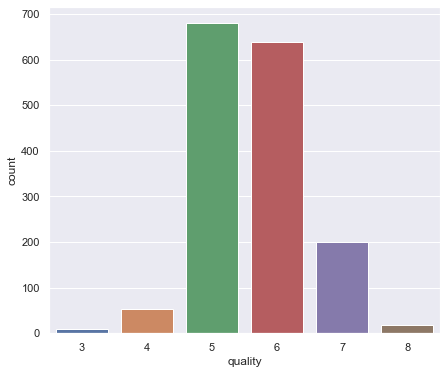

In [8]:
sns.set(rc={'figure.figsize':(7,6)})
sns.countplot(red_wine_df['quality'])

In [9]:
def draw_hist(temp_df, bin_size = 15):
    ax = sns.distplot(temp_df)
    #xmin, xmax = ax.get_xlim()
    #ax.set_xticks(np.round(np.linspace(xmin, xmax, bin_size), 2))
    plt.tight_layout()
    plt.locator_params(axis='y', nbins=6)
    plt.show()
    print("Skewness is {}".format(temp_df.skew()))
    print("Mean is {}".format(np.median(temp_df)))
    print("Median is {}".format(np.mean(temp_df)))

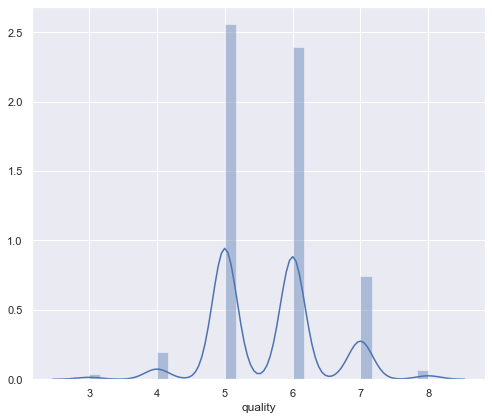

Skewness is 0.21780157547366327
Mean is 6.0
Median is 5.6360225140712945


In [10]:
draw_hist(red_wine_df['quality'])

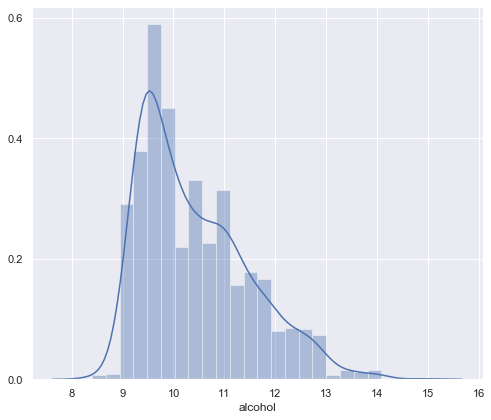

Skewness is 0.8608288069184189
Mean is 10.2
Median is 10.422983114446502


In [11]:
draw_hist(red_wine_df['alcohol'])

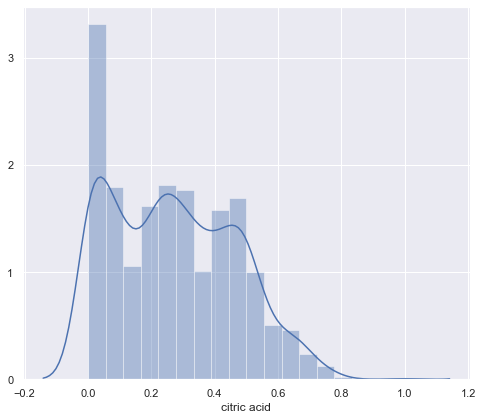

Skewness is 0.3183372952546368
Mean is 0.26
Median is 0.2709756097560964


In [12]:
draw_hist(red_wine_df['citric acid'])

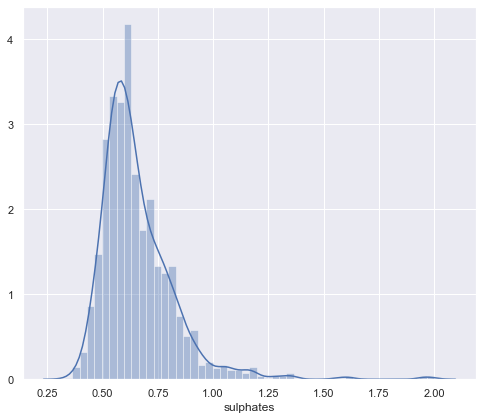

Skewness is 2.4286723536602945
Mean is 0.62
Median is 0.6581488430268921


In [13]:
draw_hist(red_wine_df['sulphates'])

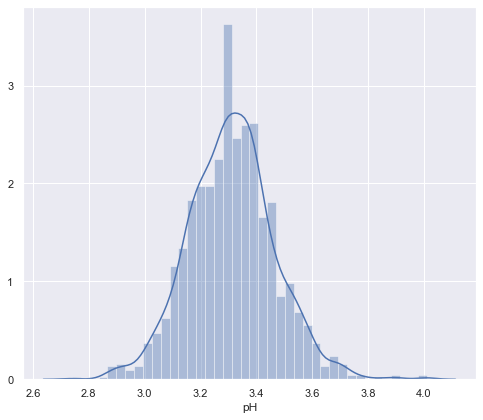

Skewness is 0.19368349811284427
Mean is 3.31
Median is 3.311113195747343


In [14]:
draw_hist(red_wine_df['pH'])

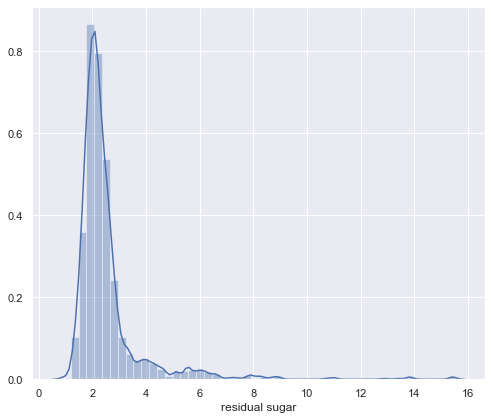

Skewness is 4.54065542590319
Mean is 2.2
Median is 2.5388055034396517


In [15]:
draw_hist(red_wine_df['residual sugar'])

<h3>Lets check which of the other columns are highly correlated to Quality</h3>

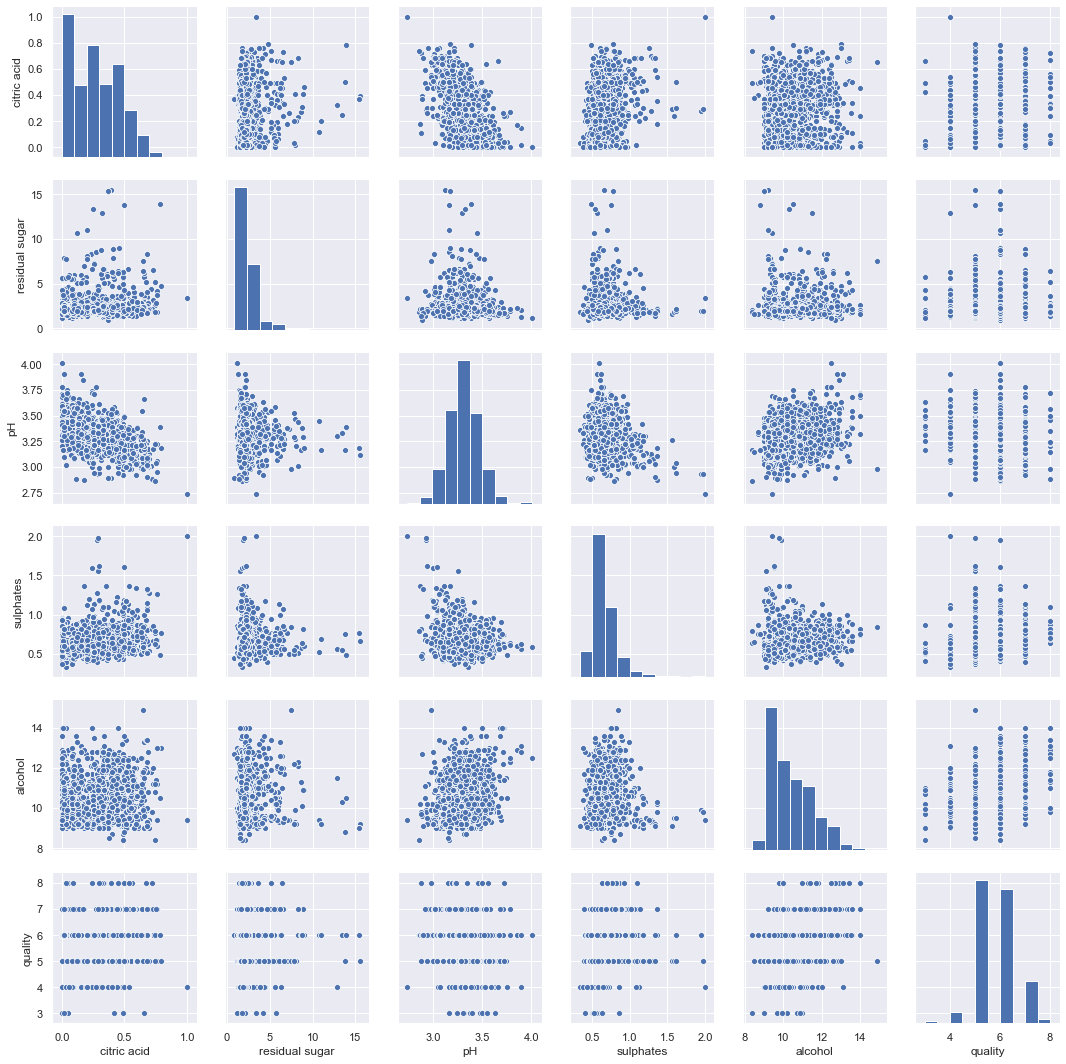

In [16]:
sns.pairplot(red_wine_df) #Draw scatterplots for joint relationships and histograms for univariate distributions

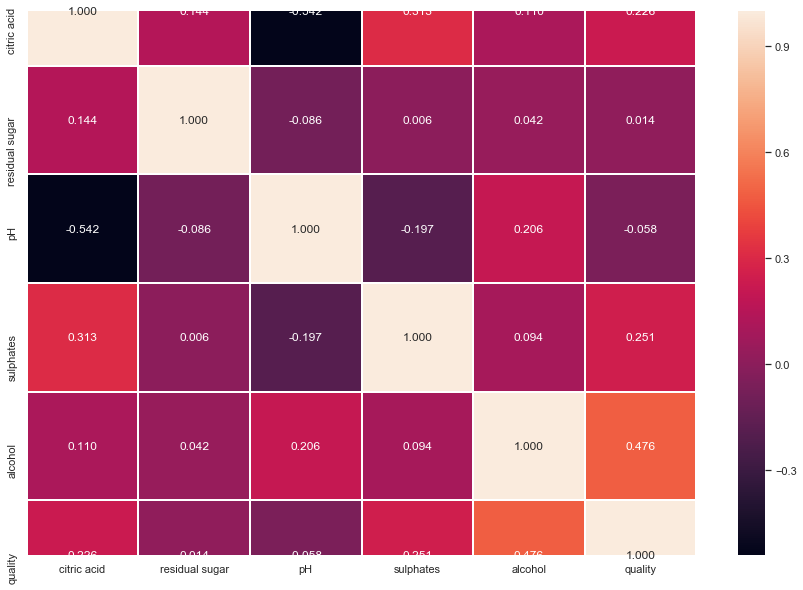

In [17]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(red_wine_df.corr(), annot=True, fmt='.3f', linewidths=1)

* Quality has <b>positive correlation</b> with alcohol, citric acid and sulphates
* Residual sugar has +ve correlation with citric acid
* pH has -ve correlation with citric acid

In [18]:
from scipy.stats import pearsonr
def get_corr(col1, col2, temp_df):
    pearson_corr, p_value = pearsonr(temp_df[col1], temp_df[col2])
    print("Correlation between {} and {} is {}".format(col1, col2, pearson_corr))
    print("P-value of this correlation is {}".format(p_value))

In [19]:
get_corr('residual sugar', 'citric acid', red_wine_df)

Correlation between residual sugar and citric acid is 0.14357716157031414
P-value of this correlation is 8.083723190070133e-09


In [20]:
get_corr('pH', 'citric acid', red_wine_df)

Correlation between pH and citric acid is -0.5419041447395094
P-value of this correlation is 1.0072013259124107e-122


In [21]:
get_corr('alcohol', 'quality', red_wine_df)

Correlation between alcohol and quality is 0.4761663239995367
P-value of this correlation is 2.831476979241185e-91


In [22]:
get_corr('sulphates', 'quality', red_wine_df)

Correlation between sulphates and quality is 0.2513970790692614
P-value of this correlation is 1.8020884534533382e-24


In [23]:
get_corr('citric acid', 'quality', red_wine_df)

Correlation between citric acid and quality is 0.2263725143180414
P-value of this correlation is 4.9912952505121016e-20


In [24]:
get_corr('pH', 'quality', red_wine_df)

Correlation between pH and quality is -0.05773139120538214
P-value of this correlation is 0.020962778651490887


In [25]:
get_corr('residual sugar', 'quality', red_wine_df)

Correlation between residual sugar and quality is 0.013731637340066277
P-value of this correlation is 0.5832180131585295


<h1>Feature selection</h1>

In [26]:
red_wine_df = red_wine_df.drop(["pH", "residual sugar"], axis = 1)
red_wine_df.head()

,citric acid,sulphates,alcohol,quality
0,0.00,0.56,9.4,5
1,0.00,0.68,9.8,5
2,0.04,0.65,9.8,5
3,0.56,0.58,9.8,6
4,0.00,0.56,9.4,5


# Preprocessing Data for performing Machine learning algorithms

In [27]:
#Now seperate the dataset as response variable and feature variabes
X = red_wine_df.drop('quality', axis = 1)
y = red_wine_df['quality']

In [28]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print ("Training set size:", X_train.shape)
print ("Test set size:", X_test.shape)

Training set size: (1279, 3)
Test set size: (320, 3)


In [29]:
X_train.head()

,citric acid,sulphates,alcohol
493,0.31,0.74,11.6
354,0.40,0.59,11.9
342,0.47,0.75,9.8
834,0.26,0.47,9.4
705,0.15,0.49,9.9


In [30]:
#Applying Standard scaling to get optimized result
sc = preprocessing.StandardScaler()
X_train[:] = sc.fit_transform(X_train)
X_test[:] = sc.fit_transform(X_test)

C:\Users\nasty\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nasty\Anaconda3\lib\site-packages\pandas\core\frame.py:3476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer(key, value)
C:\Users\nasty\Anaconda3\lib\site-packages\pandas\core\frame.py:3464: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pyda

In [31]:
X_test.head()

,citric acid,sulphates,alcohol
803,-0.963137,0.063493,-0.755088
124,-0.494584,-1.159646,-0.844713
350,-0.234277,2.237962,-0.486214
682,0.234277,-0.751933,-0.575839
1326,-0.130154,-0.344220,0.141159


In [32]:
X_train.head()

,citric acid,sulphates,alcohol
493,0.192092,0.458223,1.123177
354,0.652753,-0.401197,1.408272
342,1.011045,0.515517,-0.587390
834,-0.063831,-1.088733,-0.967516
705,-0.626861,-0.974144,-0.492358


<h1>Our training and testing data is ready now to perform machine learning algorithm</h1>

<h3>Linear Regression</h3>

In [33]:
reg = LinearRegression()

In [34]:
# Now, lets train our model
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# Now the model is trained and ready to predict the values for the test set
predictions = reg.predict(X_test)

In [36]:
# Let's compare the actual and the predicted values for the test set
rel_diff = np.abs(np.divide(y_test - predictions, y_test)) * 100
compare = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'Error%': rel_diff})
compare.head(10)

,Actual,Predicted,Error%
803,6,5.270320,12.161325
124,5,5.122728,2.454567
350,6,5.720026,4.666240
682,5,5.341478,6.829553
1326,6,5.617176,6.380407
976,5,5.190302,3.806043
1493,5,5.329096,6.581930
706,5,5.230019,4.600386
613,5,5.553684,11.073681
1587,6,5.702668,4.955533


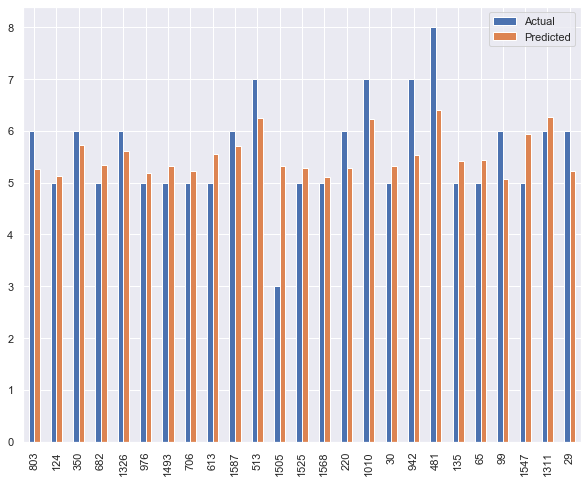

In [37]:
compare = compare.drop("Error%", axis = 1)
df = compare.head(25)
df.plot(kind='bar',figsize=(10,8))

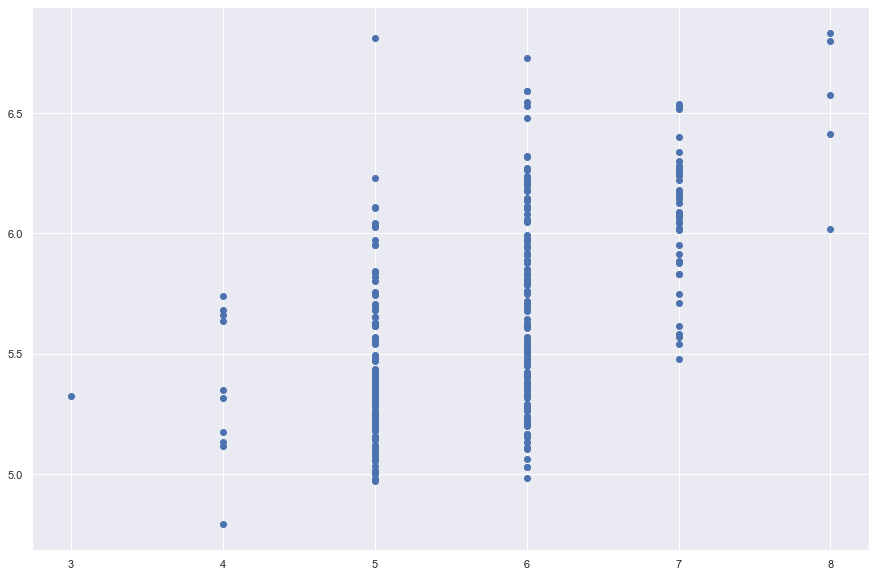

In [38]:
plt.scatter(y_test, predictions)

<h1>Result evaluating</h1>

The final step is to evaluate the performance of the model. We'll use evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).

In [39]:
# calculating errors
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5393965514145342
MSE: 0.4459474033231138
RMSE: 0.6677929344663013


Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

[0.30144338 0.33469306 0.36386356]


C:\Users\nasty\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


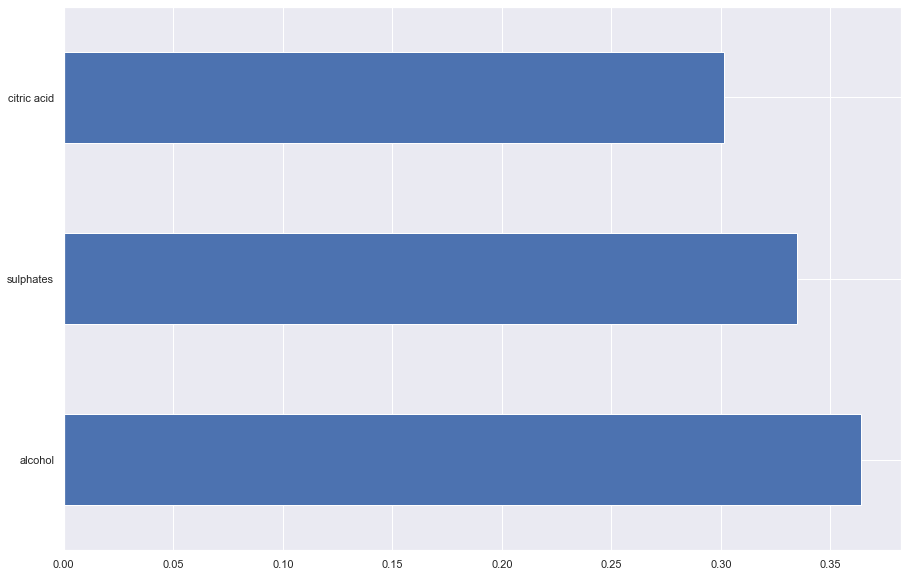

In [40]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_) # use inbuilt class feature_importances of tree based classifiers
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


<h3>Custom Regression</h3>

In [41]:
def hypothesis(X, theta):
    h_thetha = X.dot(theta);
    return h_thetha

In [42]:
def cost_function(X, y, theta):
    m = X.shape[0]
    J = 0
    if m == 0:
        return None
    else:
        J = np.sum(((hypothesis(X, theta) - y) ** 2))
        return J/(2*m)

In [43]:
def derivative(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None 
    d_thetha = np.dot(hypothesis(X, theta) - y.values, X)/m
    return d_thetha

In [44]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        delta = derivative(X, y, theta)
        theta = theta - alpha*delta
        J = cost_function(X, y, theta)
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [45]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print ("Training set size:", X_train.shape)
print ("Test set size:", X_test.shape)

Training set size: (1279, 3)
Test set size: (320, 3)


<h3>Hyperparameter selection</h3>

Adjusting the regression parameters: training speed and number of iterations

In [46]:
alpha = 0.01
num_iters = 1500

Add 1-column, start of gradient descent and print the optimal values found on the screen

In [47]:
ones = []
m = X_train.shape[0]
for i in range(m):
    ones.append(1)
X_train.insert(0, "1", ones, True)
thetha = np.zeros(len(X_train.columns))
X_train.head()

,1,citric acid,sulphates,alcohol
493,1,0.31,0.74,11.6
354,1,0.40,0.59,11.9
342,1,0.47,0.75,9.8
834,1,0.26,0.47,9.4
705,1,0.15,0.49,9.9


In [48]:
ones = []
m = X_test.shape[0]
for i in range(m):
    ones.append(1)
X_test.insert(0, "0", ones, True)
X_test.head()

,0,citric acid,sulphates,alcohol
803,1,0.08,0.66,9.6
124,1,0.17,0.48,9.5
350,1,0.22,0.98,9.9
682,1,0.31,0.54,9.8
1326,1,0.24,0.60,10.6


In [49]:
#Applying Standard scaling to get optimized result
#sc = preprocessing.StandardScaler()
#X_train[:] = sc.fit_transform(X_train)
#X_test[:] = sc.fit_transform(X_test)

In [50]:
new_thetha, Js = gradient_descent(X_train, y_train, thetha, alpha, num_iters, False)
predictions = hypothesis(X_test, new_thetha)
new_thetha

array([0.27960926, 0.28587182, 0.42143854, 0.4775298 ])

In [51]:
print(cost_function(X_train, y_train, thetha))

16.139562157935888


In [52]:
# Let's compare the actual and the predicted values for the test set
rel_diff = np.abs(np.divide(y_test - predictions, y_test)) * 100
compare = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'Error%': rel_diff})
compare.head(10)

,Actual,Predicted,Error%
803,6,5.164914,13.918092
124,5,5.067031,1.340621
350,6,5.483056,8.615736
682,5,5.275598,5.511967
1326,6,5.662897,5.618376
976,5,5.073299,1.465979
1493,5,5.234624,4.692474
706,5,5.275853,5.517062
613,5,5.379897,7.597942
1587,6,5.794279,3.428677


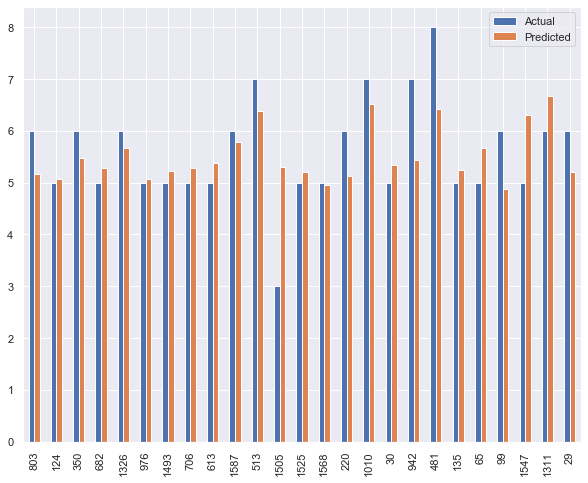

In [53]:
compare = compare.drop("Error%", axis = 1)
df = compare.head(25)
df.plot(kind='bar',figsize=(10,8))

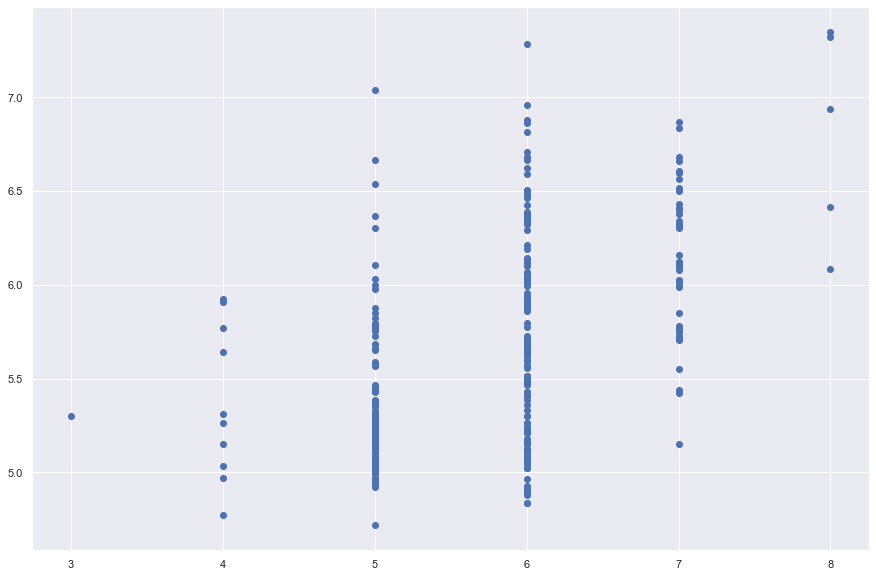

In [54]:
plt.scatter(y_test, predictions)

<h1>Result evaluating</h1>

We'll use evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).

In [55]:
# calculating errors
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5462997274043069
MSE: 0.48725968552643223
RMSE: 0.6980398882058476
